## Install and import neccessery libraries

In [ ]:
!pip -q install hypper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 KB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 68.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
moviepy 0.2.3.5 requires decorator<5.0,>=4.0.2, but you have decorator 5.1.1 which is incompatible.


In [5]:
import pandas as pd

from hypper.undersampling import CDWU
from hypper.feature_selection import CDWFS, RandomWalkFS
from hypper.data import read_german_data

## Read dataset

Example dataset can be loaded directly with predefined functions (it will be downloaded to your local machine). The dataset can consist of NaN values. However, it is important to mention that hypergraph-based algorithms treat all numerical features as categorical (discretization may be useful). Any additional steps for preprocessing are not required.

In [60]:
df, label, _ = read_german_data()
df.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


## Undersampling

The hypergraph-based undersampling algorithm uses a class-dependent weighting method. A minimal example is presented below. For more details on how undersampling works and what certain parameters do you can visit [documentation](https://hypper-team.github.io/hypper/undersampling.html).

<AxesSubplot:>

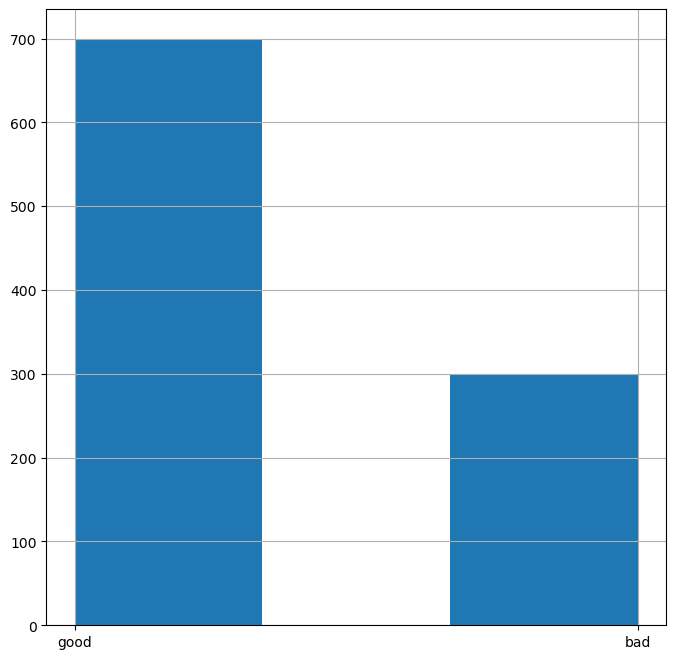

In [7]:
# Class distribution
df['Risk'].hist(bins=3)

In [8]:
cdwu = CDWU(
    weighting_iterations=2,
    weighting_history=True,
    majority_left_threshold=0,
    version=1
)
df_resampled = cdwu.fit_transform(data=df, label_column=label)
df_resampled.head(3)

C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
4,53,male,2,free,little,little,4870,24,car,bad


<AxesSubplot:>

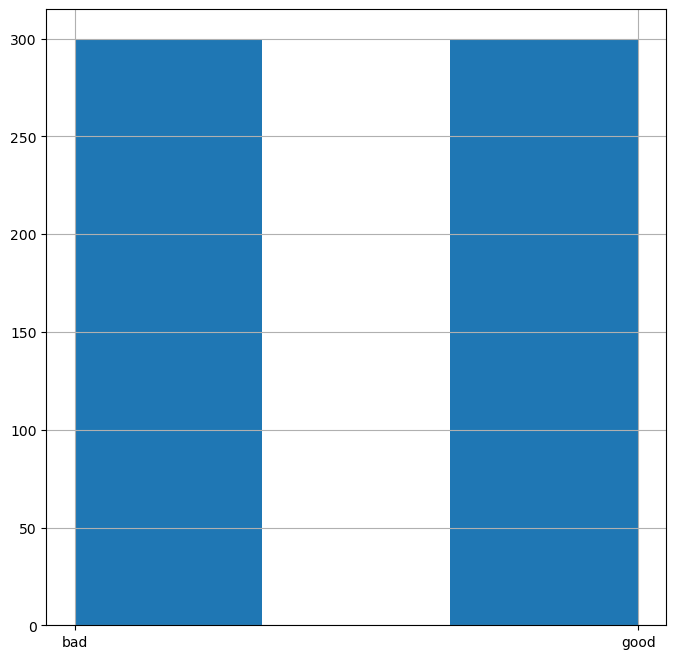

In [9]:
# Class distribution
df_resampled['Risk'].hist(bins=3)

## Feature selection

Hypper implements two approaches for feature selection:
*   using features weights from class-dependent hypergrph weighting,
*   or random walk on hypergraph.

Check [documentation](https://hypper-team.github.io/hypper/feature_selection.html) for more details.

In [10]:
cdwfs = CDWFS(
    weighting_iterations=2,
    weighting_normalization_strategy='l1',
    feature_values=False)
feature_importances = cdwfs.fit_transform(data=df, label_column=label)
feature_importances
#feature_importances.sort_values(by='feature_importance', ascending=False)

C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\hypper\feature_selection\feature_selection.py:27: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return fi.groupby(grouper, axis=0).sum()


,feature_importance
Age,0.049249
Checking account,0.093543
Credit amount,0.224962
Duration,0.048814
Housing,0.034683
Job,0.008565
Purpose,0.026861
Saving accounts,0.048958
Sex,0.020417


In [ ]:
rwfs = RandomWalkFS(
    iterations=100,
    walk_length=3,
    scoring_variant='v1_3',
    feature_values=False)
feature_importances = rwfs.fit_transform(data=df, label_column=label)
feature_importances.sort_values(by='feature_importance', ascending=False)

,feature_importance
Credit amount,69.0
Age,29.0
Duration,17.0
Purpose,7.0
Saving accounts,5.0
Checking account,4.0
Job,4.0
Housing,3.0
Sex,2.0


In [1]:
!pip -q install hypper

In [8]:
import numpy as np
import pandas as pd

from hypper.undersampling import CDWU
from hypper.feature_selection import CDWFS, RandomWalkFS
from hypper.data import read_german_data

seed_value = 41
np.random.seed(seed_value)

file_path = 'D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/pairsoncorrelation.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)



# Now 'df' contains the data from your CSV file
print(df)

#X = df.iloc[:, :-1]  # Features (all columns except the last one)
#y = df.iloc[:, -1]   # Labels (last column)

#y = y.astype(int) 

# Now you have your features in X and labels in y
#print("Features:")
#print(X)
#print("\nLabels:")
#print(y)




        aac_1     aac_2     aac_3     aac_4     aac_5     aac_6     aac_7  \
0    0.200000  0.000000  0.000000  0.133333  0.133333  0.000000  0.000000   
1    0.000000  0.052632  0.052632  0.052632  0.157895  0.000000  0.052632   
2    0.052632  0.000000  0.105263  0.052632  0.157895  0.000000  0.000000   
3    0.000000  0.000000  0.052632  0.052632  0.157895  0.000000  0.052632   
4    0.000000  0.000000  0.000000  0.000000  0.200000  0.050000  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
449  0.071253  0.031941  0.036855  0.061425  0.022113  0.088452  0.024570   
450  0.111732  0.055866  0.033520  0.027933  0.000000  0.044693  0.039106   
451  0.120419  0.078534  0.020942  0.062827  0.000000  0.062827  0.026178   
452  0.075922  0.080260  0.034707  0.073753  0.004338  0.084599  0.032538   
453  0.120253  0.078059  0.023207  0.052743  0.006329  0.086498  0.040084   

        aac_8     aac_9    aac_10  ...    qso_15    qso_16    qso_17  \
0  

In [9]:
import csv

cdwfs = CDWFS(
    weighting_iterations=2,
    weighting_normalization_strategy='l1',
    feature_values=False)

cdwfs.fit_transform(data=df, label_column="Output")
feature_importances = cdwfs.fit_transform(data=df, label_column="Output")

#feature_importances = feature_importances.sort_values(by='feature_importance', ascending=False)
#print(feature_importances)




C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\hypper\feature_selection\feature_selection.py:27: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return fi.groupby(grouper, axis=0).sum()
C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored 

In [10]:
feature_importances.sort_values(by='feature_importance', ascending=False)

,feature_importance
dipep_1,0.149297
dipep_2,0.145849
dipep_3,0.137316
pseudo_2,0.067782
dist_1,0.041991
pseudo_3,0.040604
pseudo_1,0.036666
dist_2,0.032244
dist_8,0.031915
dist_7,0.031701


In [11]:
#copy the "feature_importances" dataframe into new dataframe "feat_imp"
feat_imp = feature_importances.copy()


In [12]:
# see index values of the "feat_imp" dataframe
feat_imp.index.values

array(['aac_1', 'aac_2', 'aac_3', 'aac_4', 'aac_5', 'aac_6', 'aac_7',
       'aac_8', 'aac_9', 'comp_1', 'comp_2', 'comp_3', 'comp_4', 'comp_5',
       'comp_6', 'dipep_1', 'dipep_2', 'dipep_3', 'dipep_4', 'dipep_5',
       'dipep_6', 'dipep_7', 'dipep_8', 'dipep_9', 'dist_1', 'dist_2',
       'dist_3', 'dist_4', 'dist_5', 'dist_6', 'dist_7', 'dist_8',
       'dist_9', 'pseudo_1', 'pseudo_2', 'pseudo_3', 'pseudo_4',
       'pseudo_5', 'pseudo_6', 'pseudo_7', 'pseudo_8', 'pseudo_9',
       'pssm_18', 'pssm_2', 'pssm_85', 'qso_1', 'qso_20', 'qso_8', 'ss_1',
       'ss_2', 'ss_3', 'ss_4', 'ss_5', 'ss_6', 'tran_1', 'tran_2',
       'tran_3', 'tran_4', 'tran_5', 'tran_6'], dtype=object)

In [13]:
# Create a new column "feature" by taking the index values of the "feat_imp" dataframe
feat_imp['feature'] = feat_imp.index.values
#reorder column names, first column is "feature" and second column is "feature_importance"
feat_imp = feat_imp[['feature', 'feature_importance']]

In [14]:
# check column names
feat_imp.columns

Index(['feature', 'feature_importance'], dtype='object')

In [15]:
df_sorted = feat_imp.sort_values(by='feature_importance', ascending=False)

In [17]:

df_sorted.to_csv('D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/hyp_CDWFS_feat_imp.csv', index=False)

In [5]:
from hypper.plotting import *


In [6]:
import hypernetx

In [17]:
# Specify the file path
csv_file_path = "D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/example1.csv"

# Writing to CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(feature_importances)
    

In [60]:
from logging import DEBUG

from matplotlib import pyplot as plt

from hypper.hypergraph import HyperGraph
from hypper.data import read_sample_data
from hypper.plotting import HNX_Hypergraph

# Read data
df, label, _ = read_sample_data()
print(df.head(10))

# Create hypergraph
hypergraph_representation = HyperGraph(
    input_data=df,
    label=label,
    random_seed=42,
    verbosity=DEBUG,
)

# Display hypergraph representation
hnx_representation = HNX_Hypergraph(
    hypergraph_representation
)



          x1 x2  y
index             
A      alpha  y  1
B      alpha  x  1
C      alpha  y  1
D       beta  x  1
E       beta  y  0
F      gamma  x  0
G      gamma  y  0
H      gamma  x  0
I      gamma  x  0
[2024-01-15 10:01:28|hypper.hypergraph|INFO] - Input data shape: (9, 3).
[2024-01-15 10:01:28|hypper.hypergraph|INFO] - Input file in memory size: 0.002 MB.
[2024-01-15 10:01:28|hypper.hypergraph|DEBUG] - Creating hypergraph-based data representation ...
[2024-01-15 10:01:28|hypper.hypergraph|DEBUG] - Hypergraph-based data representation created.


C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


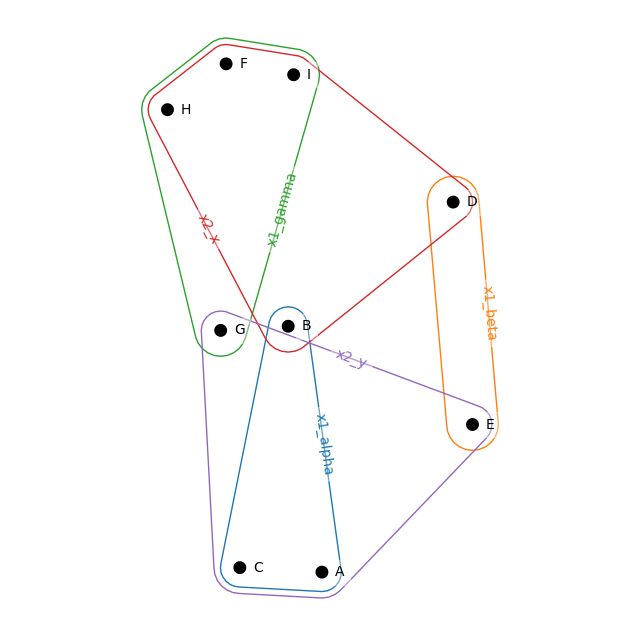

In [61]:
# Standard diagram
hnx_representation.draw()
plt.show()



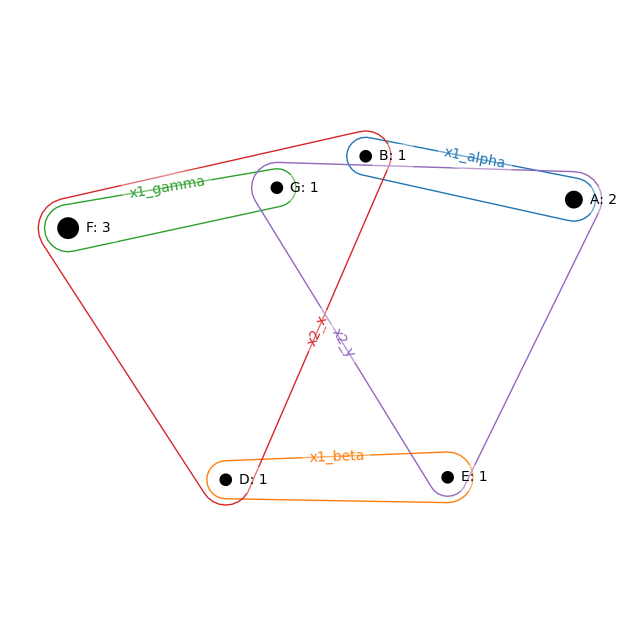

In [62]:
# Drawing with collapsed nodes
hnx_representation.draw_collapse_nodes()
plt.show()



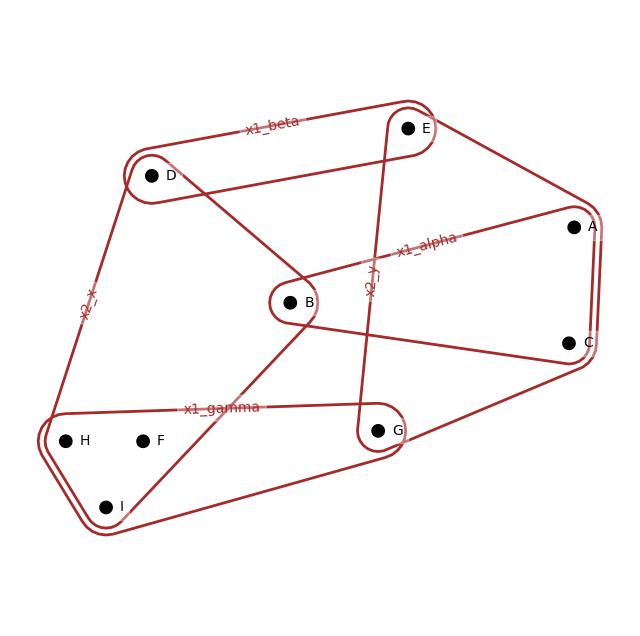

In [63]:
# Drawing with HNX specific parameters
# https://hypernetx.readthedocs.io/en/latest/drawing/drawing.html
hnx_representation.draw(
    edges_kwargs={
        'linewidths': 2,
        'edgecolors': 'brown',
    },
)
plt.show()

In [85]:
import pandas as pd

from logging import DEBUG

from matplotlib import pyplot as plt

from hypper.hypergraph import HyperGraph
from hypper.data import read_sample_data
from hypper.plotting import HNX_Hypergraph

# Read data
#df, label, _ = read_sample_data()

#file_path = 'D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/pairsoncorrelation.csv'
file_path = 'D:/Research_Work/research on new idae/idea1/Feature_Extraction/hypergrap_generate.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

print(df)

# Select a subset of columns
#subset_columns = ['aac_1', 'aac_4', 'qso_15', 'qso_16', 'pssm_2', 'pssm_295', 'Output']

# Create a new DataFrame with the selected columns
#subset_df = df[subset_columns]
# Get column names as a list
#df = df.columns               



# Specify the column to convert to rows
#column_to_convert = 'feature_importance'

# Extract values from the specified column
#values_to_convert = [item[column_to_convert] for item in df]

# Create a new DataFrame with the values as a row
#transposed_df = pd.DataFrame([values_to_convert], columns=[column_to_convert])

#print(transposed_df)

  SMQ020  RIDAGEYR RIAGENDR CVD_risk
0     No         2     Male      Yes
1    Yes         2     Male      Yes
2    Yes         4     Male      Yes
3    Yes         4   Female      Yes
4    Yes         4     Male      Yes
5    Yes         4   Female       No
6     No         1   Female       No
7    Yes         2     Male       No
8     No         1     Male       No
9     No         3     Male       No


In [1]:
import pandas as pd

# Assuming df is your DataFrame
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 22],
    'City': ['New York', 'San Francisco', 'Los Angeles']
})

# Specify the column to convert to a row
column_to_convert = 'Age'

# Extract values from the specified column
values_to_convert = df[column_to_convert].tolist()

# Create a new DataFrame with the values as a single row
transposed_df = pd.DataFrame([values_to_convert], columns=[column_to_convert])

print(transposed_df)


ValueError: 1 columns passed, passed data had 3 columns

In [86]:
# Create hypergraph
hypergraph_representation = HyperGraph(
    #input_data=df,
    input_data=df,
    label="CVD_risk",
    random_seed=42,
    verbosity=DEBUG,
)
hypergraph_representation
# Display hypergraph representation
hnx_representation = HNX_Hypergraph(
    hypergraph_representation
)


[2025-06-04 15:06:24|hypper.hypergraph|INFO] - Input data shape: (10, 4).
[2025-06-04 15:06:24|hypper.hypergraph|INFO] - Input file in memory size: 0.002 MB.
[2025-06-04 15:06:24|hypper.hypergraph|DEBUG] - Creating hypergraph-based data representation ...
[2025-06-04 15:06:24|hypper.hypergraph|DEBUG] - Hypergraph-based data representation created.


C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


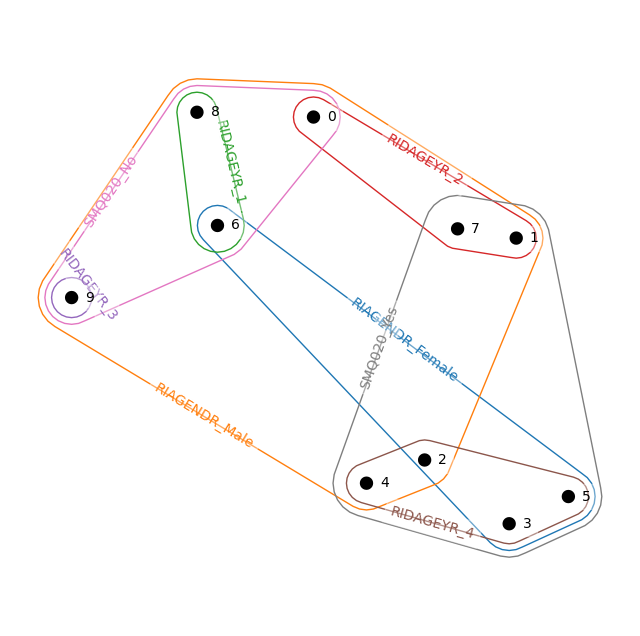

In [87]:
# Standard diagram
hnx_representation.draw()
plt.show()


C:\Users\surai\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


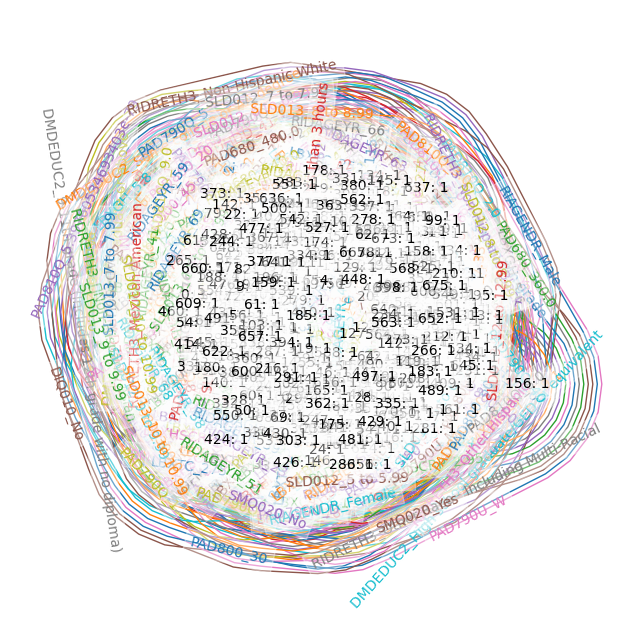

In [8]:
# Drawing with collapsed nodes
hnx_representation.draw_collapse_nodes()
plt.show()

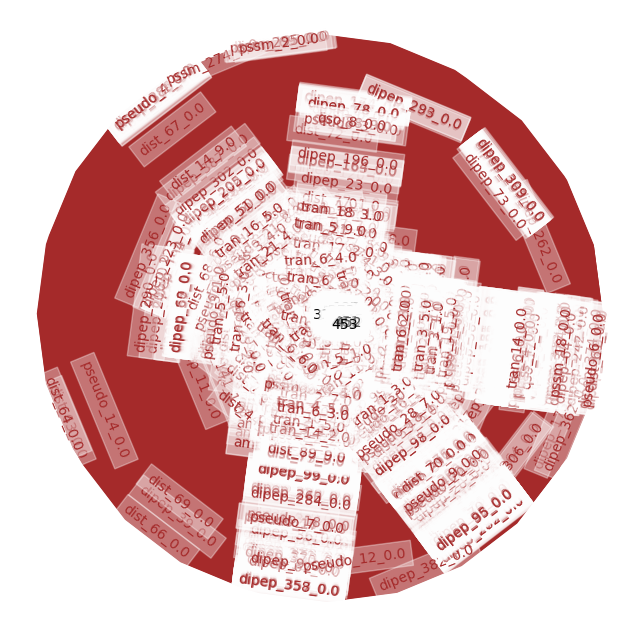

In [15]:
# Drawing with HNX specific parameters
# https://hypernetx.readthedocs.io/en/latest/drawing/drawing.html
hnx_representation.draw(
    edges_kwargs={
        'linewidths': 2,
        'edgecolors': 'brown',
    },
)
plt.show()

In [13]:
import numpy as np
import pandas as pd

from hypper.undersampling import CDWU
from hypper.feature_selection import CDWFS, RandomWalkFS
from hypper.data import read_german_data
# Read data
df, label, _ = read_german_data()
#print(df.head(10))

# Replace column names
df.columns = ['A', 'A11', 'AA1', '3A123', 'A5', 'A6', 'A7', 'A8', 'A9', 'Risk']
print(df.head(10))

# Run CDWFS
cdwfs = CDWFS(
    weighting_iterations=2,
    weighting_normalization_strategy='l1',
    feature_values=False)
feature_importances = cdwfs.fit_transform(data=df, label_column=label)
feature_importances.sort_values(by='feature_importance', ascending=False)

    A     A11  AA1 3A123          A5        A6    A7  A8                   A9  \
0  67    male    2   own         NaN    little  1169   6             radio/TV   
1  22  female    2   own      little  moderate  5951  48             radio/TV   
2  49    male    1   own      little       NaN  2096  12            education   
3  45    male    2  free      little    little  7882  42  furniture/equipment   
4  53    male    2  free      little    little  4870  24                  car   
5  35    male    1  free         NaN       NaN  9055  36            education   
6  53    male    2   own  quite rich       NaN  2835  24  furniture/equipment   
7  35    male    3  rent      little  moderate  6948  36                  car   
8  61    male    1   own        rich       NaN  3059  12             radio/TV   
9  28    male    3   own      little  moderate  5234  30                  car   

   Risk  
0  good  
1   bad  
2  good  
3  good  
4   bad  
5  good  
6  good  
7  good  
8  good  
9   bad 

C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\hypper\feature_selection\feature_selection.py:27: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return fi.groupby(grouper, axis=0).sum()


,feature_importance
A,0.556052


In [11]:
import numpy as np
import pandas as pd

from hypper.undersampling import CDWU
from hypper.feature_selection import CDWFS, RandomWalkFS
from hypper.data import read_german_data
import string
import random
from sklearn.preprocessing import KBinsDiscretizer

def generate_unique_column_names(num_columns):
    column_names = set()
    while len(column_names) < num_columns:
        # Generate a random string of alphanumeric characters
        new_column = ''.join(random.choices(string.ascii_letters + string.digits, k=8))
        column_names.add(new_column)

    return list(column_names)

# Generate 603 unique column names
column_names_list = generate_unique_column_names(603)

# Print the result


column_names_list[-1] = 'Output'
#print(column_names_list)
file_path = 'D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/pairsoncorrelation.csv'

# Read the CSV file into a pandas DataFrame
#df = pd.read_csv(file_path)
data = pd.read_csv(file_path)

# Create a DataFrame
#df = pd.DataFrame(data)

df=data.copy()

#df['Output'] = df['Output'].replace({1: 'Yes', -1: 'No'})

df['Output'] = df['Output'].replace({1: 'Yes', -1: 'No'})

print(df)
# Select only numerical columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Initialize KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

# Fit and transform the data for all numerical columns
df[numeric_columns] = kbins.fit_transform(df[numeric_columns])

# Display the DataFrame
print(df)

        aac_1     aac_2     aac_3     aac_4     aac_5     aac_6     aac_7  \
0    0.200000  0.000000  0.000000  0.133333  0.133333  0.000000  0.000000   
1    0.000000  0.052632  0.052632  0.052632  0.157895  0.000000  0.052632   
2    0.052632  0.000000  0.105263  0.052632  0.157895  0.000000  0.000000   
3    0.000000  0.000000  0.052632  0.052632  0.157895  0.000000  0.052632   
4    0.000000  0.000000  0.000000  0.000000  0.200000  0.050000  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
449  0.071253  0.031941  0.036855  0.061425  0.022113  0.088452  0.024570   
450  0.111732  0.055866  0.033520  0.027933  0.000000  0.044693  0.039106   
451  0.120419  0.078534  0.020942  0.062827  0.000000  0.062827  0.026178   
452  0.075922  0.080260  0.034707  0.073753  0.004338  0.084599  0.032538   
453  0.120253  0.078059  0.023207  0.052743  0.006329  0.086498  0.040084   

        aac_8     aac_9    aac_10  ...    qso_15    qso_16    qso_17  \
0  

C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [1]:
import numpy as np
import pandas as pd

from hypper.undersampling import CDWU
from hypper.feature_selection import CDWFS, RandomWalkFS
from hypper.data import read_german_data
import string
import random
from sklearn.preprocessing import KBinsDiscretizer

def generate_unique_column_names(num_columns):
    column_names = set()
    while len(column_names) < num_columns:
        # Generate a random string of alphanumeric characters
        new_column = ''.join(random.choices(string.ascii_letters + string.digits, k=8))
        column_names.add(new_column)

    return list(column_names)

# Generate 23 unique column names
column_names_list = generate_unique_column_names(32)

# Print the result


column_names_list[-1] = 'CVD_risk'
#column_names_list[0] = 'Output'
print("column list")
print(column_names_list)
#print(column_names_list)
file_path = 'D:/Research_Work/research on new idae/idea1/Feature_Extraction/dataSplit/revised_data/validate_train_data.csv'

# Read the CSV file into a pandas DataFrame
#df = pd.read_csv(file_path)
data = pd.read_csv(file_path)

# Create a DataFrame
#df = pd.DataFrame(data)

df=data.copy()

#df['Output'] = df['Output'].replace({1: 'Yes', -1: 'No'})

#df['CVD_risk'] = df['CVD_risk'].replace({1: 'Yes', 0: 'No'})

print(df)
# Select only numerical columns
numeric_columns = df.select_dtypes(include=['number']).columns
print("Test data ")
numeric_columns

# Initialize KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

# Fit and transform the data for all numerical columns
df[numeric_columns] = kbins.fit_transform(df[numeric_columns])

# Display the DataFrame
print(df)
#df.to_csv('D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/hyp_descretization_10_feat_val.csv', index=False)
df.to_csv('D:/Research_Work/research on new idae/idea1/Feature_Extraction/hypergraph/revised_data/hyp_descretization_5_feat_val.csv', index=False)
df_original = df.copy()
#print(df_original.columns)
df.columns =column_names_list

dummy_cols = df.columns
org_cols = df_original.columns

# Create a hashmap using a dictionary comprehension
column_map = {a: b for a, b in zip(dummy_cols, org_cols)}
print(column_map)

#print(df.columns)


#print(df.head(10))

#df.to_csv('D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/pairson_new_col.csv', index=False)


column list
['ylrw2S2Q', 'ZXVM46Xa', '85auhAk0', 'qXeyake2', 'kb4tDUaC', 'KmnwIGz1', '98K6Mw73', '5sJ2qs8A', 'HMQ4qOxw', 'zCxKWol4', 'occTOFan', 'hpHNqQ0y', 'dNqsgAf9', 'sCqUAfaW', 'sADxcPkJ', 'CequmiFK', 'ON08TTLE', 'sqgShZ8H', 'KKQL4uqg', 'DijwwnrS', 'R3yISUtR', 'FD2LvJWE', 'lQmH03tJ', 'VaMwvYAj', 'pkAd8k5m', 'q9pdaLKB', '4dQzN0I4', 'HJWMnWkO', '3jxsrkFQ', 'mRELnPsm', 'GulmzE00', 'CVD_risk']
    SMQ020       PAD810Q  PAD790Q PAD790U  PAD800        PAD680  SLD012  \
0       No  5.397605e-79        1       W      45  5.397605e-79     7.0   
1      Yes  5.397605e-79        6       W     120  2.400000e+02     8.0   
2      Yes  2.000000e+00        2       D      25  3.000000e+02     6.0   
3      Yes  5.397605e-79        4       W      30  9.000000e+01     9.0   
4       No  5.397605e-79        5       W      40  2.400000e+02     7.0   
..     ...           ...      ...     ...     ...           ...     ...   
531    Yes  6.000000e+00        1       W     120  5.400000e+02     7.0   
532

C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [2]:
cdwfs = CDWFS(
    weighting_iterations=2,
    weighting_normalization_strategy='l1',
    feature_values=False)

cdwfs.fit_transform(data=df, label_column="CVD_risk")
feature_importances = cdwfs.fit_transform(data=df, label_column="CVD_risk")
feature_importances

C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

,feature_importance
3jxsrkFQ,0.007675
4dQzN0I4,0.005296
5sJ2qs8A,0.003837
85auhAk0,0.004044
98K6Mw73,0.006867
CequmiFK,0.007942
DijwwnrS,0.008329
FD2LvJWE,0.001233
GulmzE00,0.010277
HJWMnWkO,0.005112


In [3]:
feat_imp = feature_importances.copy()

In [4]:
feat_imp

,feature_importance
3jxsrkFQ,0.007675
4dQzN0I4,0.005296
5sJ2qs8A,0.003837
85auhAk0,0.004044
98K6Mw73,0.006867
CequmiFK,0.007942
DijwwnrS,0.008329
FD2LvJWE,0.001233
GulmzE00,0.010277
HJWMnWkO,0.005112


In [5]:

# Create a new column "feature" by taking the index values of the "feat_imp" dataframe
feat_imp['feature'] = feat_imp.index.values
#feat_imp['original_feature'] = df_original.columns

feat_imp.columns

Index(['feature_importance', 'feature'], dtype='object')

In [6]:
#reorder column names, first column is "feature" and second column is "feature_importance"
feat_imp = feat_imp[['feature', 'feature_importance']]
feat_imp

,feature,feature_importance
3jxsrkFQ,3jxsrkFQ,0.007675
4dQzN0I4,4dQzN0I4,0.005296
5sJ2qs8A,5sJ2qs8A,0.003837
85auhAk0,85auhAk0,0.004044
98K6Mw73,98K6Mw73,0.006867
CequmiFK,CequmiFK,0.007942
DijwwnrS,DijwwnrS,0.008329
FD2LvJWE,FD2LvJWE,0.001233
GulmzE00,GulmzE00,0.010277
HJWMnWkO,HJWMnWkO,0.005112


In [7]:
df_sorted = feat_imp.sort_values(by='feature_importance', ascending=False)

#df_sorted.to_csv('D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/hyp_CDWFS_feat_imp_de10.csv', index=False)

In [8]:
df_sorted

,feature,feature_importance
lQmH03tJ,lQmH03tJ,0.035372
zCxKWol4,zCxKWol4,0.032426
VaMwvYAj,VaMwvYAj,0.030657
pkAd8k5m,pkAd8k5m,0.024767
q9pdaLKB,q9pdaLKB,0.021332
ylrw2S2Q,ylrw2S2Q,0.017606
KKQL4uqg,KKQL4uqg,0.017311
HMQ4qOxw,HMQ4qOxw,0.013862
occTOFan,occTOFan,0.012641
dNqsgAf9,dNqsgAf9,0.011928


In [9]:
rows = df_sorted.shape[0]
df_backup = df_sorted.copy()
df_backup ['original_feature'] = feat_imp.index.values
df_sorted

,feature,feature_importance
lQmH03tJ,lQmH03tJ,0.035372
zCxKWol4,zCxKWol4,0.032426
VaMwvYAj,VaMwvYAj,0.030657
pkAd8k5m,pkAd8k5m,0.024767
q9pdaLKB,q9pdaLKB,0.021332
ylrw2S2Q,ylrw2S2Q,0.017606
KKQL4uqg,KKQL4uqg,0.017311
HMQ4qOxw,HMQ4qOxw,0.013862
occTOFan,occTOFan,0.012641
dNqsgAf9,dNqsgAf9,0.011928


In [10]:
df_sorted.iloc[0,0]

'lQmH03tJ'

In [11]:
for index, value in df_sorted['feature'].items():
    if value in column_map:
        org_val = column_map[value]
        df_backup.at[index, 'original_feature'] = org_val
        

In [12]:
df_backup = df_backup[['original_feature','feature', 'feature_importance']]
df_backup

,original_feature,feature,feature_importance
lQmH03tJ,BPQ101D,lQmH03tJ,0.035372
zCxKWol4,RIDAGEYR,zCxKWol4,0.032426
VaMwvYAj,BPQ020,VaMwvYAj,0.030657
pkAd8k5m,BPQ080,pkAd8k5m,0.024767
q9pdaLKB,RXQ033,q9pdaLKB,0.021332
ylrw2S2Q,SMQ020,ylrw2S2Q,0.017606
KKQL4uqg,LBXTC,KKQL4uqg,0.017311
HMQ4qOxw,DIQ010,HMQ4qOxw,0.013862
occTOFan,RIAGENDR,occTOFan,0.012641
dNqsgAf9,DMDEDUC2,dNqsgAf9,0.011928


In [13]:
df_backup.to_csv('D:/Research_Work/research on new idae/idea1/Feature_Extraction/hypergraph/revised_data/hyp_CDWFS_feat_mapped_d5New.csv', index=False)

In [14]:

rwfs = RandomWalkFS(
    iterations=400,
    walk_length=3,
    scoring_variant='v1_3',
    feature_values=False)
feature_importances1 = rwfs.fit_transform(data=df, label_column='CVD_risk')
feature_importances1
feature_importances1.sort_values(by='feature_importance', ascending=False)
feature_importances1

C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,feature_importance
3jxsrkFQ,5.0
4dQzN0I4,3.0
5sJ2qs8A,4.0
85auhAk0,3.0
98K6Mw73,4.0
CequmiFK,5.0
DijwwnrS,5.0
FD2LvJWE,2.0
GulmzE00,3.0
HJWMnWkO,4.0


In [15]:
feat_imp1 = feature_importances1.copy()

In [16]:
feat_imp1

,feature_importance
3jxsrkFQ,5.0
4dQzN0I4,3.0
5sJ2qs8A,4.0
85auhAk0,3.0
98K6Mw73,4.0
CequmiFK,5.0
DijwwnrS,5.0
FD2LvJWE,2.0
GulmzE00,3.0
HJWMnWkO,4.0


In [17]:
# Create a new column "feature" by taking the index values of the "feat_imp" dataframe
feat_imp1['feature'] = feat_imp1.index.values
#feat_imp['original_feature'] = df_original.columns

feat_imp1.columns

Index(['feature_importance', 'feature'], dtype='object')

In [18]:
#reorder column names, first column is "feature" and second column is "feature_importance"
feat_imp1 = feat_imp1[['feature', 'feature_importance']]
feat_imp1

,feature,feature_importance
3jxsrkFQ,3jxsrkFQ,5.0
4dQzN0I4,4dQzN0I4,3.0
5sJ2qs8A,5sJ2qs8A,4.0
85auhAk0,85auhAk0,3.0
98K6Mw73,98K6Mw73,4.0
CequmiFK,CequmiFK,5.0
DijwwnrS,DijwwnrS,5.0
FD2LvJWE,FD2LvJWE,2.0
GulmzE00,GulmzE00,3.0
HJWMnWkO,HJWMnWkO,4.0


In [19]:
df_sorted1 = feat_imp1.sort_values(by='feature_importance', ascending=False)
df_sorted1

#df_sorted.to_csv('D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/hyp_CDWFS_feat_imp_de10.csv', index=False)

,feature,feature_importance
hpHNqQ0y,hpHNqQ0y,6.0
3jxsrkFQ,3jxsrkFQ,5.0
KKQL4uqg,KKQL4uqg,5.0
sqgShZ8H,sqgShZ8H,5.0
sCqUAfaW,sCqUAfaW,5.0
sADxcPkJ,sADxcPkJ,5.0
mRELnPsm,mRELnPsm,5.0
kb4tDUaC,kb4tDUaC,5.0
dNqsgAf9,dNqsgAf9,5.0
ON08TTLE,ON08TTLE,5.0


In [20]:
rows = df_sorted1.shape[0]
df_backup1 = df_sorted1.copy()
df_backup1 ['original_feature'] = feat_imp1.index.values
df_sorted1
        

,feature,feature_importance
hpHNqQ0y,hpHNqQ0y,6.0
3jxsrkFQ,3jxsrkFQ,5.0
KKQL4uqg,KKQL4uqg,5.0
sqgShZ8H,sqgShZ8H,5.0
sCqUAfaW,sCqUAfaW,5.0
sADxcPkJ,sADxcPkJ,5.0
mRELnPsm,mRELnPsm,5.0
kb4tDUaC,kb4tDUaC,5.0
dNqsgAf9,dNqsgAf9,5.0
ON08TTLE,ON08TTLE,5.0


In [21]:
for index, value in df_sorted1['feature'].items():
    if value in column_map:
        org_val = column_map[value]
        df_backup1.at[index, 'original_feature'] = org_val
        

In [22]:
df_backup1 = df_backup1[['original_feature','feature', 'feature_importance']]
df_backup1

,original_feature,feature,feature_importance
hpHNqQ0y,RIDRETH3,hpHNqQ0y,6.0
3jxsrkFQ,LBXHGB,3jxsrkFQ,5.0
KKQL4uqg,LBXTC,KKQL4uqg,5.0
sqgShZ8H,BPXODI1,sqgShZ8H,5.0
sCqUAfaW,INDFMPIR,sCqUAfaW,5.0
sADxcPkJ,BMXBMI,sADxcPkJ,5.0
mRELnPsm,LBXPLTSI,mRELnPsm,5.0
kb4tDUaC,PAD800,kb4tDUaC,5.0
dNqsgAf9,DMDEDUC2,dNqsgAf9,5.0
ON08TTLE,BPXOSY1,ON08TTLE,5.0


In [23]:
df_backup2 = df_backup1[['original_feature', 'feature_importance']]
df_backup2

,original_feature,feature_importance
hpHNqQ0y,RIDRETH3,6.0
3jxsrkFQ,LBXHGB,5.0
KKQL4uqg,LBXTC,5.0
sqgShZ8H,BPXODI1,5.0
sCqUAfaW,INDFMPIR,5.0
sADxcPkJ,BMXBMI,5.0
mRELnPsm,LBXPLTSI,5.0
kb4tDUaC,PAD800,5.0
dNqsgAf9,DMDEDUC2,5.0
ON08TTLE,BPXOSY1,5.0


In [24]:
df_backup2.to_csv('D:/Research_Work/research on new idae/idea1/Feature_Extraction/hypergraph/revised_data/walking_5.csv', index=False)